#Import the right libraries

In [104]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
import hopsworks
import pandas as pd

In [106]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/190613
Connected. Call `.close()` to terminate connection gracefully.


In [107]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv')
wine_df 


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Transform column names into valid names   

In [108]:
wine_df.columns = wine_df.columns.str.replace(' ', '_')
wine_df.columns = wine_df.columns.str.lower()
wine_df


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [109]:
y_wine = wine_df['quality']
X_wine = wine_df.drop(['quality'], axis=1)

2023-11-17 17:00:15,761 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 17:00:15,772 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



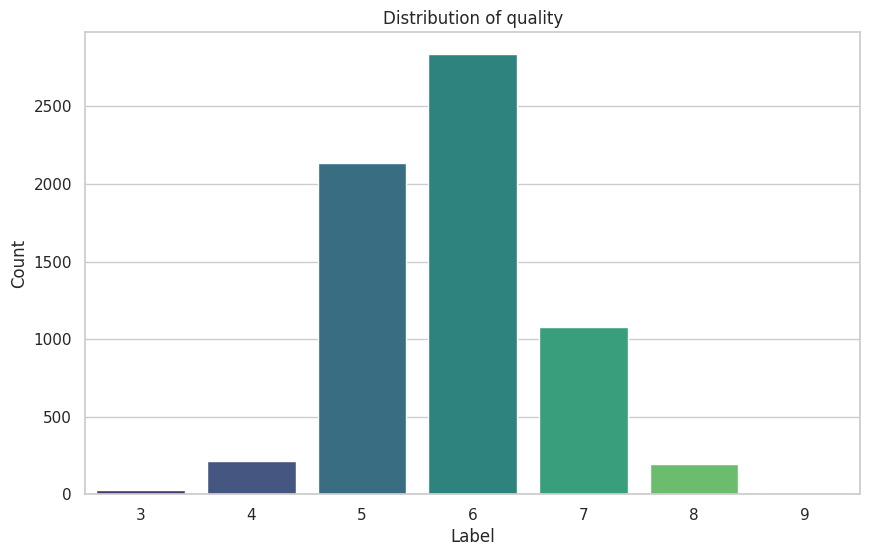

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'label_column' is the column you want to visualize
label_column = 'quality'
sns.set(style="whitegrid")  # Set the style for seaborn

# Count the occurrences of each unique value in the label column
label_counts = wine_df['quality'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of ' + label_column)




# Show the plot
plt.show()

wine_df['quality'].value_counts()

# Clean up all na and process all catergorial data

In [111]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#I only want to encode the first column
X_wine['type'] = label_encoder.fit_transform(X_wine['type'])
X_wine.head(-5)

wine_df_cleaned = pd.concat([X_wine, y_wine], axis=1)
wine_df_cleaned.head(-5)
wine_df = wine_df_cleaned
wine_df.fillna(0, inplace=True)

wine_df

print(wine_df.isna().sum())



type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [117]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# Create a StandardScaler object
#normalize the data

y_wine = wine_df['quality']
x_wine = wine_df.drop(['quality'], axis=1)

scaler = StandardScaler()
# Standardize the data
x_wine_standard = scaler.fit_transform(x_wine)


x_wine_standard = pd.DataFrame(x_wine_standard, columns=x_wine.columns)

x_wine_standard.head(6400)

Wine_standard = x_wine_standard 
#I want to add y_wine to the last column of X_wine_standard
Wine_standard['quality'] = y_wine
Wine_standard

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.571367,-0.154935,-0.419922,0.284942,3.206683,-0.314605,0.815565,0.959976,2.102214,-1.067966,-0.541640,-1.418558,6
1,0.571367,-0.682768,-0.238066,0.147373,-0.807621,-0.200456,-0.931107,0.287618,-0.232332,0.429622,-0.273793,-0.831615,6
2,0.571367,0.674516,-0.359304,0.560080,0.306296,-0.171918,-0.029599,-0.331660,0.134525,0.229944,-0.608601,-0.328521,6
3,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,-0.876448,-0.496219,6
4,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,-0.876448,-0.496219,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-1.750190,-0.758172,1.580494,-1.641026,-0.723552,0.969578,0.083090,-1.269422,0.067824,1.178416,0.328861,0.006875,5
6493,-1.750190,-0.984386,1.277401,-1.503457,-0.681518,0.170530,0.477500,-1.145567,0.141195,1.527854,-3.554912,0.593818,6
6494,-1.750190,-0.682768,1.034926,-1.297103,-0.660500,0.570054,-0.085943,-1.340197,0.347969,1.028657,1.467208,0.426120,6
6495,-1.750190,-0.984386,1.853279,-1.365888,-0.723552,0.541517,0.083090,-1.269422,0.257923,1.777452,1.199362,-0.244672,5


In [160]:
from sklearn.model_selection import train_test_split
x = Wine_standard.drop(['quality'], axis=1)
y = Wine_standard['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

x_train.head()
x_test.head()


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
369,0.571367,-0.079531,0.307502,0.216157,1.483264,-0.343143,-0.254976,-0.774000,-0.198981,-0.219333,-1.613025,0.929214
6243,-1.750190,0.749921,0.610595,-0.540473,-0.660500,0.199068,-1.156484,-1.552520,0.478037,0.180024,-0.005947,-0.244672
3374,0.571367,-0.984386,-0.904872,-0.746827,-0.786604,-0.314605,1.491697,0.340698,-0.429101,0.529461,-0.608601,-0.831615
1009,0.571367,0.825325,-1.147347,0.491296,-0.870673,-0.029231,0.083090,0.535328,-0.565838,-0.668609,-0.943409,0.006875
220,0.571367,0.222088,-0.419922,0.284942,0.327313,-0.571442,0.815565,0.853814,-0.265683,-0.918207,-1.345179,0.426120


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




def model_evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train.values.ravel())
    predictions = model.predict(x_test)
    print("Accuracy score: %.2f" % accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    score = model.score(x_test, y_test)

    cm = metrics.confusion_matrix(y_test, predictions)
    print(cm)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5,
                square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size=10)
    return score

Accuracy score: 0.69
[[  0   0   2   4   0   0   0]
 [  0   7  21  11   0   0   0]
 [  0   2 311 114   2   0   0]
 [  0   1  79 444  30   1   0]
 [  0   0   4 105 118   0   0]
 [  0   0   0  18  10  14   0]
 [  0   0   0   1   1   0   0]]
[[  0   0   2   4   0   0   0]
 [  0   7  21  11   0   0   0]
 [  0   2 311 114   2   0   0]
 [  0   1  79 444  30   1   0]
 [  0   0   4 105 118   0   0]
 [  0   0   0  18  10  14   0]
 [  0   0   0   1   1   0   0]]


0.6876923076923077

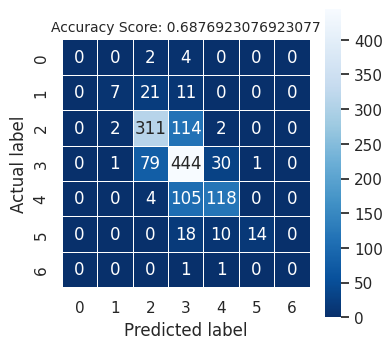

In [120]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_evaluation(model, x_train, x_test, y_train, y_test)

In [161]:
Wine_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   float64
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


In [162]:
wine_fg = fs.get_or_create_feature_group(name='winequality'
                                           ,version='6'
                                           ,primary_key=['type','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol']
                                            ,description='wine quality')
wine_fg.insert(Wine_standard)

Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:07 | Remaining Time: 00:00


Launching job: winequality_6_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/190613/jobs/named/winequality_6_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f20a450b100>, None)

In [141]:
wine_fg = fs.get_feature_group(name="winequality", version=6)
query = wine_fg.select_all()
print(query.show(10))
# feature_view = fs.get_or_create_feature_view(name="winequality",
#                                              version=5,
#                                              description="Read from winequality feature group",
#                                              labels=["quality"],
#                                              query=query)


Finished: Reading data from Hopsworks, using ArrowFlight (1.27s) 
       type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  0.571367      -1.059791          0.246883    -0.402904       -0.912708   
1  0.571367       0.976135         -0.359304     0.147373        1.756489   
2 -1.750190       2.408823         -0.480541     1.110357       -0.744570   
3 -1.750190       2.635037          3.399055     0.147373        0.243244   
4  0.571367      -0.230340         -0.116829    -0.127765       -0.765587   
5 -1.750190      -1.059791          1.641113    -1.434673       -0.765587   
6  0.571367       1.654776         -0.298685     1.591849       -0.681518   
7  0.571367       0.674516         -0.419922     0.628865       -0.839147   
8  0.571367       0.146683         -0.844253     0.353727        2.418534   
9 -1.750190       1.277753          1.519876     0.491296       -0.660500   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0   0.0

In [152]:
## Make the query into a pandas dataframe








Finished: Reading data from Hopsworks, using ArrowFlight (1.39s) 
       type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  0.571367      -1.059791          0.246883    -0.402904       -0.912708   
1  0.571367       0.976135         -0.359304     0.147373        1.756489   
2 -1.750190       2.408823         -0.480541     1.110357       -0.744570   
3 -1.750190       2.635037          3.399055     0.147373        0.243244   
4  0.571367      -0.230340         -0.116829    -0.127765       -0.765587   
5 -1.750190      -1.059791          1.641113    -1.434673       -0.765587   
6  0.571367       1.654776         -0.298685     1.591849       -0.681518   
7  0.571367       0.674516         -0.419922     0.628865       -0.839147   
8  0.571367       0.146683         -0.844253     0.353727        2.418534   
9 -1.750190       1.277753          1.519876     0.491296       -0.660500   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0   0.0

In [151]:
print(Wine_standard.head(10))


       type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  0.571367      -0.154935         -0.419922     0.284942        3.206683   
1  0.571367      -0.682768         -0.238066     0.147373       -0.807621   
2  0.571367       0.674516         -0.359304     0.560080        0.306296   
3  0.571367      -0.004126         -0.662397     0.009804        0.642572   
4  0.571367      -0.004126         -0.662397     0.009804        0.642572   
5  0.571367       0.674516         -0.359304     0.560080        0.306296   
6  0.571367      -0.758172         -0.116829    -1.090750        0.327313   
7  0.571367      -0.154935         -0.419922     0.284942        3.206683   
8  0.571367      -0.682768         -0.238066     0.147373       -0.807621   
9  0.571367       0.674516         -0.723016     0.766434       -0.828639   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0  -0.314605             0.815565              0.959976  2.102214 -1.0679

In [154]:
Wine_standard.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.571367,-0.154935,-0.419922,0.284942,3.206683,-0.314605,0.815565,0.959976,2.102214,-1.067966,-0.541640,-1.418558,6
1,0.571367,-0.682768,-0.238066,0.147373,-0.807621,-0.200456,-0.931107,0.287618,-0.232332,0.429622,-0.273793,-0.831615,6
2,0.571367,0.674516,-0.359304,0.560080,0.306296,-0.171918,-0.029599,-0.331660,0.134525,0.229944,-0.608601,-0.328521,6
3,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,-0.876448,-0.496219,6
4,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,-0.876448,-0.496219,6


In [163]:
query.show(5)





Finished: Reading data from Hopsworks, using ArrowFlight (1.50s) 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.571367,-1.059791,0.246883,-0.402904,-0.912708,0.056381,-0.593041,0.429167,-0.662555,0.279863,-0.675563,-0.663917,6
1,0.571367,0.976135,-0.359304,0.147373,1.756489,-0.428755,0.083090,0.800733,1.135045,-0.419011,-0.876448,-0.496219,6
2,-1.750190,2.408823,-0.480541,1.110357,-0.744570,0.284680,-1.381861,-1.871006,0.848229,0.579381,2.270748,0.342271,6
3,-1.750190,2.635037,3.399055,0.147373,0.243244,1.597401,-0.424009,-0.296272,2.732541,0.030265,0.998477,-0.999313,5
4,0.571367,-0.230340,-0.116829,-0.127765,-0.765587,-0.571442,-0.142287,0.022213,-0.669225,0.130104,-0.340755,0.426120,6
